In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/data/Standard bank - job simulation/train.csv")
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             614 non-null    object 
 1   gender              601 non-null    object 
 2   married             611 non-null    object 
 3   dependents          599 non-null    object 
 4   education           614 non-null    object 
 5   self_employed       582 non-null    object 
 6   applicant_income    614 non-null    int64  
 7   coapplicant_income  614 non-null    float64
 8   loan_amount         592 non-null    float64
 9   loan_amount_term    600 non-null    float64
 10  credit_history      564 non-null    float64
 11  property_area       614 non-null    object 
 12  loan_status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Checking for null values

data.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [6]:
## Cheking for duplicate values

data.duplicated().sum()

0

<Axes: >

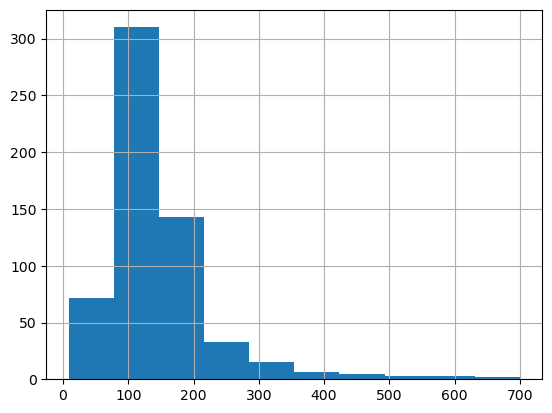

In [7]:
data['loan_amount'].hist()

<Axes: >

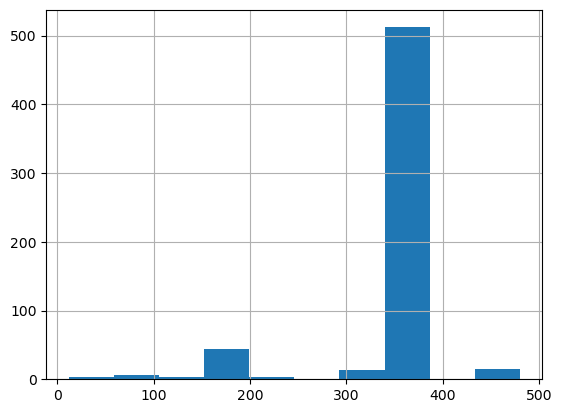

In [8]:
data['loan_amount_term'].hist()

In [9]:
data['credit_history'].value_counts()

credit_history
1.0    475
0.0     89
Name: count, dtype: int64

In [10]:
data['dependents'].value_counts()

dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [11]:
data['dependents'] = data['dependents'].replace("3+",3)

In [12]:
data['dependents'].value_counts()

dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [13]:
# Checking the education column

data['education'].value_counts()

education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [14]:
# Checking self employed column

data['self_employed'].head(10)

0     No
1     No
2    Yes
3     No
4     No
5    Yes
6     No
7     No
8     No
9     No
Name: self_employed, dtype: object

In [15]:
data['self_employed'].value_counts()

self_employed
No     500
Yes     82
Name: count, dtype: int64

In [16]:
data['applicant_income'].tail(20)

594    16120
595     3833
596     6383
597     2987
598     9963
599     5780
600      416
601     2894
602     5703
603     3676
604    12000
605     2400
606     3400
607     3987
608     3232
609     2900
610     4106
611     8072
612     7583
613     4583
Name: applicant_income, dtype: int64

In [17]:
data['coapplicant_income'].tail(10)

604       0.0
605    3800.0
606    2500.0
607    1411.0
608    1950.0
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: coapplicant_income, dtype: float64

<Axes: >

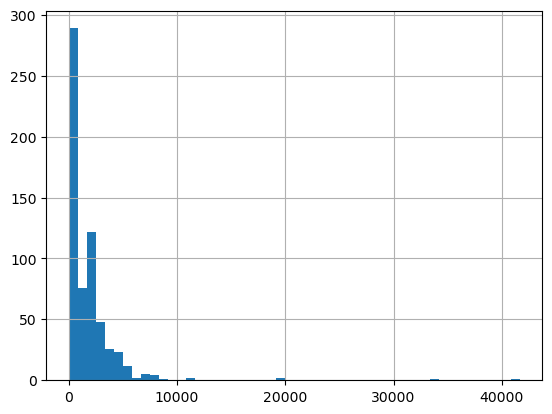

In [18]:
data['coapplicant_income'].hist(bins=50)

In [19]:
# Cheking loan realted columns

data['loan_amount_term'].head(10)

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
5    360.0
6    360.0
7    360.0
8    360.0
9    360.0
Name: loan_amount_term, dtype: float64

In [20]:
data['loan_amount_term'].value_counts()

loan_amount_term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: >

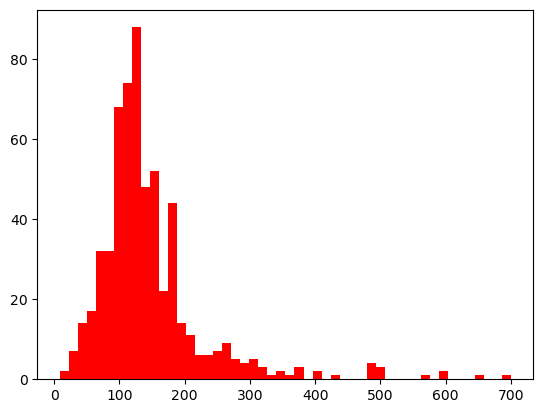

In [21]:
data['loan_amount'].hist(bins=50,color='red',grid=False)

In [22]:
data['loan_status'].value_counts()/len(data)*100

loan_status
Y    68.729642
N    31.270358
Name: count, dtype: float64

In [23]:
data['property_area'].value_counts()

property_area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [24]:
# Filling loan amount column

data['loan_amount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: loan_amount, dtype: float64

In [25]:
mean_loan = data['loan_amount'].mean()

data['loan_amount'] = data['loan_amount'].fillna(mean_loan)

In [26]:
data.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [27]:
data['married'].value_counts()

married
Yes    398
No     213
Name: count, dtype: int64

In [28]:
mode_married = data['married'].mode()[0]

data['married'].fillna(mode_married,inplace=True)

In [29]:
loan_mode = data['loan_amount_term'].mode()[0]

data['loan_amount_term'].fillna(loan_mode,inplace=True)

In [30]:
data.isnull().sum()

loan_id                0
gender                13
married                0
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_amount_term       0
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [31]:
data['gender'].value_counts()

gender
Male      489
Female    112
Name: count, dtype: int64

In [32]:
gender_mode = data['gender'].mode()[0]
dep_mode = data['dependents'].mode()[0]

data['gender'].fillna(gender_mode,inplace=True)
data['dependents'].fillna(dep_mode,inplace=True)

In [33]:
data['dependents'] = data['dependents'].astype(int)

In [34]:
data.isnull().sum()

loan_id                0
gender                 0
married                0
dependents             0
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount            0
loan_amount_term       0
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [35]:
# Removing rest of the null values as their count is very high, imputing it may cause bais in the model

data.dropna(inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             538 non-null    object 
 1   gender              538 non-null    object 
 2   married             538 non-null    object 
 3   dependents          538 non-null    int32  
 4   education           538 non-null    object 
 5   self_employed       538 non-null    object 
 6   applicant_income    538 non-null    int64  
 7   coapplicant_income  538 non-null    float64
 8   loan_amount         538 non-null    float64
 9   loan_amount_term    538 non-null    float64
 10  credit_history      538 non-null    float64
 11  property_area       538 non-null    object 
 12  loan_status         538 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 56.7+ KB


In [37]:
data['credit_history'] = data['credit_history'].astype(int)

In [38]:
data['loan_amount_term'] = data['loan_amount_term'].astype(int)

In [39]:
data.drop('loan_id',axis=1,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              538 non-null    object 
 1   married             538 non-null    object 
 2   dependents          538 non-null    int32  
 3   education           538 non-null    object 
 4   self_employed       538 non-null    object 
 5   applicant_income    538 non-null    int64  
 6   coapplicant_income  538 non-null    float64
 7   loan_amount         538 non-null    float64
 8   loan_amount_term    538 non-null    int32  
 9   credit_history      538 non-null    int32  
 10  property_area       538 non-null    object 
 11  loan_status         538 non-null    object 
dtypes: float64(2), int32(3), int64(1), object(6)
memory usage: 48.3+ KB


In [41]:
data.to_csv('cleaned_data_Loan_Status.csv', index=False)

In [42]:
data.describe()

,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,0.756506,5432.211896,1541.438513,145.371107,342.758364,0.836431
std,1.022195,5885.545882,2517.250234,81.119033,64.124916,0.370228
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2896.250000,0.000000,101.250000,360.000000,1.000000
50%,0.000000,3858.500000,1062.000000,130.000000,360.000000,1.000000
75%,2.000000,5820.500000,2245.500000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [43]:
# Cheking for outliers 

num_cols = data[['applicant_income','coapplicant_income','loan_amount']]

outlier_count = {}

for col in num_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count[col] = len(outliers)
    
for col, count in outlier_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in applicant_income: 45
Number of outliers in coapplicant_income: 21
Number of outliers in loan_amount: 34


* We will run logistic regression without outliers and decision tree and random forest with outliers as these models handle outliers well.

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

#### Logsitic Regression

In [45]:
logis_data = data.copy()
logis_data.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360,1,2,1


In [46]:
x=logis_data.drop(columns=["loan_status"])
y=logis_data[["loan_status"]]

In [47]:
y.value_counts()/len(y)*100

loan_status
1              67.472119
0              32.527881
Name: count, dtype: float64

 1 = yes , 0 = no

In [48]:
x.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,0,0,0,0,5849,0.0,146.412162,360,1,2
1,1,1,1,0,0,4583,1508.0,128.000000,360,1,0
2,1,1,0,0,1,3000,0.0,66.000000,360,1,2
3,1,1,0,1,0,2583,2358.0,120.000000,360,1,2
4,1,0,0,0,0,6000,0.0,141.000000,360,1,2


In [49]:
x.corr()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
gender,1.000000,0.363129,0.197051,0.048870,0.001471,0.038904,0.159074,0.102475,-0.073403,0.021499,-0.028192
married,0.363129,1.000000,0.357233,0.009256,0.023313,0.054544,0.114964,0.182820,-0.105779,0.014907,0.014727
dependents,0.197051,0.357233,1.000000,0.035526,0.053924,0.158827,-0.013161,0.204716,-0.103714,-0.031628,-0.009609
education,0.048870,0.009256,0.035526,1.000000,-0.013504,-0.146350,-0.059085,-0.170006,-0.099166,-0.088129,-0.042164
self_employed,0.001471,0.023313,0.053924,-0.013504,1.000000,0.143969,-0.000616,0.108289,-0.037432,0.003883,-0.046564
applicant_income,0.038904,0.054544,0.158827,-0.146350,0.143969,1.000000,-0.123291,0.544698,-0.021934,-0.019174,-0.042878
coapplicant_income,0.159074,0.114964,-0.013161,-0.059085,-0.000616,-0.123291,1.000000,0.168990,-0.009350,-0.003212,-0.015470
loan_amount,0.102475,0.182820,0.204716,-0.170006,0.108289,0.544698,0.168990,1.000000,0.035636,-0.011905,-0.098734
loan_amount_term,-0.073403,-0.105779,-0.103714,-0.099166,-0.037432,-0.021934,-0.009350,0.035636,1.000000,-0.001354,-0.071769
credit_history,0.021499,0.014907,-0.031628,-0.088129,0.003883,-0.019174,-0.003212,-0.011905,-0.001354,1.000000,0.001743


In [50]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(x)

In [51]:
## Spliting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,train_size=0.70,stratify = y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((376, 11), (162, 11), (376, 1), (162, 1))

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

In [53]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_test)
predicted_proba = classifier.predict_proba(x_test)

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
predicted_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1])

In [55]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted_values)
cf

array([[26, 27],
       [10, 99]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
k = classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.72      0.49      0.58        53
           1       0.79      0.91      0.84       109

    accuracy                           0.77       162
   macro avg       0.75      0.70      0.71       162
weighted avg       0.76      0.77      0.76       162



 * Logistic regression with outliers in data have given 72% accuaracy, whereas without outliers the model gave 78% accuarcy. 

#### Decision Tree 

In [57]:
X=data.drop(columns=["loan_status"])
Y=data[["loan_status"]]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.30,stratify=y,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((376, 11), (162, 11), (376, 1), (162, 1))

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [61]:
#Model building
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train,y_train)

dt_pred = decision_tree.predict(x_test)
dt_pred_train = decision_tree.predict(x_train)

In [62]:
from sklearn.metrics import confusion_matrix
cfd = confusion_matrix(y_test,dt_pred)
cfd

array([[31, 22],
       [25, 84]], dtype=int64)

In [63]:
k= classification_report(y_train,dt_pred_train)
print(k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       254

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [64]:
from sklearn.metrics import classification_report
kd = classification_report(y_test,dt_pred)
print(kd)

              precision    recall  f1-score   support

           0       0.55      0.58      0.57        53
           1       0.79      0.77      0.78       109

    accuracy                           0.71       162
   macro avg       0.67      0.68      0.68       162
weighted avg       0.71      0.71      0.71       162



* We can see 30 % difference in accuarcy bof train and test data

#### Random Forest model

In [65]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [66]:
classifier.fit(x_train,y_train)

C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [67]:
predicted_values = classifier.predict(x_train)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       254

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [69]:
predicted_values_ts = classifier.predict(x_test)
print(classification_report(y_test,predicted_values_ts))

              precision    recall  f1-score   support

           0       0.74      0.60      0.67        53
           1       0.82      0.90      0.86       109

    accuracy                           0.80       162
   macro avg       0.78      0.75      0.76       162
weighted avg       0.80      0.80      0.80       162



* The random forest model has given us the best accuarcy of 0.80